<a href="https://colab.research.google.com/github/GorohovskiMax/MNIST-handwritten-dataset---ML-implementations/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠**Handwritten Digit Classification - A Practical Exploration with the MNIST dataset** 🔍


# Introduction:
In this assignment, we will analyze and solve the classic **digit classification problem** using the well-known **MNIST Dataset**. The MNIST dataset consists of 70,000 images of **handwritten digits (digits 0 to 9)** that are written in different forms and variations (varying in handwriting). This makes it an excellent benchmark for understanding and implementing machine learning techniques.

In this notebook, we will **compare and contrast three Machine Learning approaches** to solve this digit classification problem. We will explore the way in which these approaches work, try to analyze their strengths and weaknesses and analyze which of the approaches can be more suitable for the following problem.

 In order to do so, the notebook will be organized into **three key parts** as outlined below:

---


- 🔹**Part A: Multi-Class Perceptron** 🤖

 - In this section of the notebook we will implement the **Perceptron Learning Algorithm** to classify digits. As we will later see, The Perceptron is a **linear binary classifier** and to extend it to multi-class classification problem, we will adopt the **One vs All (OvA)** approach.

 - This part will involve the use of the **"Pocket Algorithm"**, which is an enhancement of the **Perceptron algorithm** for a **linearly inseperable** data.


- 🔹**Part B: Softmax Regression** 🌐

 - In this section, we will introduce the **Softmax Regression**, a generalization of **Logistic Regression** for multi-class classification.
 Rather than producing a single positive or negative output, this algorithm provides the **class probabilities**. This characteristic makes it particularly suitable for problems involving more than two classes (multi-class problems) or for cases where we need a more detailed, probabilistic understanding of how likely each class will be.

 - We use **Cross-Entropy loss** function for optimization. We will explore the strengths of probabilistic models in handling multi-class classification tasks.


- 🔹**Part C: Linear Regression** 📊

 - In this section, we will explore an approach called **Linear Regression** for classification.

 - Although **Linear Regression** is being usually used in regression tasks (prediction of a certain continuous variable that is also a dependent variable), we will see that this approach can also be adapted for classification problem, by interpreting outputs and applying suitable threshold

---

📚 This notebook will provide a clear and comprehensive exploration of the theoretical understanding as well as the practical implementation of the models. We will discuss the results and provide comprehensive analysis.

###⏬Loading The Dataset:

To start, we will load the **MNIST dataset** from the **sklearn.datasets**. We will also import all the necessary libraries that we will use for our assignment:
1. **sklearn.model_selection** - To use the `train_test_split` function which allows us to separate the dataset into **training data** set and **test data** set

2. **seaborn** - To use **attractive** and **informative** statistical graphics

3. **matplotlib.pyplot** - To use animated visualizations and graphs. We would use it mainly for the purpose of **confusion matrices** as well as for other informative illustrations such as the **train loss** and **test loss** functions

4. **numpy** - for vectoral mathematical computation

5. **tqdm.notebook** - illustration of a progress bar. it is used to indicate a progress within the 'for' loops that we will use

6. **sklearn.metrics** - used for the confusion matrix display

After loading the dataset, we then access **two types of components**:

 **X**: which would represent the **features**, in our case the **pixels** of the images. Each image consists of 28 pixels in height and 28 pixels in width - resulting in a total of 784 pixels. Each pixel has an intensity value that ranges between 0 (black) to 255 (white).

 **Y**: which would represent the **labels**, in our case the **digits**. There are 10 digits, ranging between 0 to 9.



In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.metrics import confusion_matrix as confusion_matrix_fn

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version = 1)

# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### ✂Data Splitting:

By obtaining the X and y components, we would be able to split the dataset into **two subsets** as mentioned in the assignment:

- the first set will contain **60,000 images** and it will be our **training set**.

- The second set will contain **10,000 images** and it will be the **test set**.

To ensure that the data we will split will always stay the same each time we will run the code, we will specify the **random_state** to be 42.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 60000, test_size = 10000, random_state = 42)
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")




Training data shape: (60000, 784), Training labels shape: (60000,)
Test data shape: (10000, 784), Test labels shape: (10000,)


In order for us to better evaluate our models, and in order for us to make **accurate predictions and assumptions**, we want to work with a training set that is well distributed. In this way, we will ensure that that the model learns from all classes equally and is not biased towards any specific class.

To showcase that, we will make a graph that will visualize the distribution of the digits:

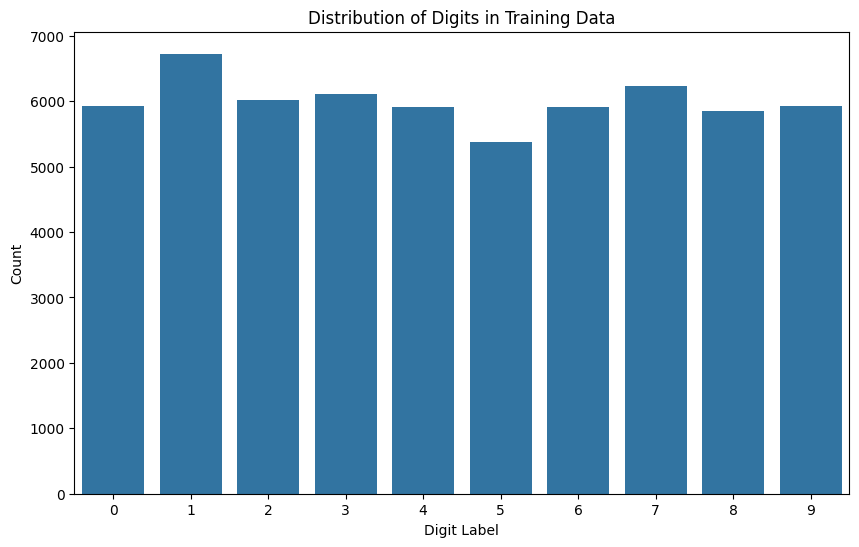

In [3]:
# Assuming 'y_train' contains the labels for the training data
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Data')
plt.show()


As we can tell by the graph, the distribution of digits within the training set is well-distributed.

### 💡Data Preparation and Preprocessing for Training and Testing
Now when we have our training set and test set ready, we will preprocess them for the **training and testing processes**.

The data we currently have consists of categorical variables. In order to make the models perform well on that data, we need to turn that data into numerical data.

In addition, we will create **One-Hot-Vector Representation** of the digit labels (for the **y_train** and **y_test**) by **indexing** the identity matrix with those labels. We will also flatten the input images to create a **vector representation of size 785 x 1**.

For the **Multi-class Perceptron** algorithm, we will adjust the first component of the matrices to be the bias terms and it will be set to 1, thus creating **X_train_with_bias** and **X_test_with_bias**.

For **Softmax Regression** and **Linear Regression**, it would also be essential to scale **X_train** and **X_test**. We do so because in those algorithms, scaling will prevent numerical instabilities when dealing with large numbers (in the case of Softmax Regression, for instance). It will also ensure that there will be equal contribution of features to the learning process, without having dominance by large-scale features (essential for Linear Regression).

After the scaling process, we will concatenate the bias component into **X_train_scaled** and **X_test_scaled** to get **X_train_with_bias** and **X_test_with_bias**.

In [4]:
# Create One-Hot-Vector using Identity Matrix
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_onehot_train = np.eye(10)[y_train]
y_onehot_test = np.eye(10)[y_test]

print(f" One-hot-vector of y_train: {y_onehot_train.shape}")
print(f" One-hot-vector of y_test: {y_onehot_test.shape}")

# Add bias to inputs
bias = np.ones((X_train.shape[0], 1))
X_train_with_bias = np.concatenate((bias, X_train), axis=1)
bias = np.ones((X_test.shape[0], 1))
X_test_with_bias = np.concatenate((bias, X_test), axis=1)

print(f" X_train for Multi-class Perceptron: {X_train_with_bias.shape}")
print(f" X_test for Multi-class Perceptron: {X_test_with_bias.shape}")

# Used for the Softmax Regression and Linear Regression
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Add bias to scaled inputs
bias_scaled = np.ones((X_train_scaled.shape[0], 1))
X_train_scaled_with_bias = np.concatenate((bias_scaled, X_train_scaled), axis=1)
bias_scaled = np.ones((X_test_scaled.shape[0], 1))
X_test_scaled_with_bias = np.concatenate((bias_scaled, X_test_scaled), axis=1)

print(f" Scaled X_train: {X_train_scaled_with_bias.shape}")
print(f" Scaled X_test: {X_test_scaled_with_bias.shape}")



 One-hot-vector of y_train: (60000, 10)
 One-hot-vector of y_test: (10000, 10)
 X_train for Multi-class Perceptron: (60000, 785)
 X_test for Multi-class Perceptron: (10000, 785)
 Scaled X_train: (60000, 785)
 Scaled X_test: (10000, 785)


## Part A: Pocket Perceptron Algorithm🤖

In this part we will implement the **Multi-Class Perceptron Algorithm**. It relies on the foundational machine learning technique called the **"Perceptron Algorithm"** which is used for binary classification tasks. This algorithm creates a linear decision boundary to separate data into two classes: **(+1) Positive** and **(-1) Negative**.

By that, it assumes that the data is **linearly separable** - thus guaranteeing that the algorithm will converge. However, in the case of the MNIST digit dataset, the dataset isn't necessarily linearly separable, which in turn, can cause the algorithm to perform poorly. In that case we will implement the **Pocket Perceptron**.

The **Pocket Algorithm** will enhance the stability and the performance of the Perceptron by maintaining, or keeping the best weight vector encounter up to iteration (or epoch) 'i' during the learning process. In order for us to train the model to recognize each digit, we must use a strategy called **One vs. All**.

The strategy will involve training **multiple** binary Perceptron classifiers to distinguish one digit from all the other digits. It will allow us to break down a complex multi-class problem into a set of binary problems, effectively training a set of classifiers to handle each class individually.

### Pocket Algorithm:
We will first implement the **Pocket Perceptron algorithm**. The major enhancement to the algorithm is that now, instead of linearly searching the misclassified examples, we will only generate random samples when we know there are misclassifications. This way, we will improve the performance of the algorithm, without using additional 'for' loop (which in turn, would've highly increased the time complexity of our model). We also keep the training errors and test errors for the results graph that we will showcase later on.

In [5]:
def pocket_perceptron(X, y, X_test, y_test, max_epochs=100):
  num_samples, num_features = X.shape # extract the number of samples with which we work and define the features (x0,...,xn values)
  weights = np.zeros(num_features) # hold the weights in a vector of the size of the features (initialized to zeros -> w0=0,...,wn=0)
  best_weights = weights.copy() # pocket the best weights we've seen so far (in terms of achieving minimized error)
  pocket_error = np.inf # pocket the minimal error
  train_loss = [] # for visualization of train loss function
  test_loss = [] # for visualization of test loss function

  for epoch in tqdm(range(max_epochs), desc='Epoch'):
    predictions = np.sign(X @ weights)
    misclassified_samples = np.where(predictions!= y)[0] # detect all misclassified samples

    if misclassified_samples.size == 0: # no misclassifications detected
       break

    random_idx = np.random.choice(misclassified_samples) # select random misclassified sample
    weights+= y[random_idx] * X[random_idx]  # update w(t) + y(t)x(t) -> w(t+1)
    current_error = np.mean(np.sign(X @ weights)!= y) # represents the E-in
    test_error = np.mean(np.sign(X_test @ best_weights)!= y_test) # represents the E-out

    if current_error < pocket_error: # check whether we have a better error rate, if we do, update the weights and error rate
        pocket_error = current_error
        best_weights = weights.copy()

    # collect train loss and test loss results
    train_loss.append(pocket_error)
    test_loss.append(test_error)

  return best_weights, train_loss, test_loss


Having the **Pocket Perceptron** algorithm ready, we can implement our `digit_training_perceptron`. This function will employ the **one vs. all** strategy.

The idea is straightforward, within each iteration, we will get a new digit and for each such digit (ranging from 0 to 9), we will assign the label (+1) to examples labeled 'i' and (-1) to examples labeled '0','1','2',...,'9' (**excluding 'i'**).

 In addition, we also maintain **train loss** and **test loss** histories in order for us to later on implement them in the train loss vs. test loss results graph.

  The end product that we would get are the resulting weight vectors after training (one for each binary classifier) as well as the training errors and the test errors.

In [6]:
def digit_train_perceptron(X_train, y_train, X_test, y_test, max_epochs=100):
  digits = np.unique(y_train) # Set of digits
  weights = [] # Weights for each digit classifier
  train_loss_history = [] # for visualization of train loss function
  test_loss_history = [] # for visualization of test loss function

  # Train the model on all digits and collect the weights and the errors
  progress_bar = tqdm(digits, desc='Processing digit 0', total=len(digits))
  for digit in progress_bar:
    progress_bar.set_description(f'Processing digit {digit}')
    binary_labels_train = np.where(y_train == digit, 1, -1) # labels to check for training
    binary_labels_test = np.where(y_test == digit, 1, -1) # labels to check for test

    best_weight, train_loss, test_loss = (pocket_perceptron(X_train, binary_labels_train, X_test, binary_labels_test, max_epochs))
    weights.append(best_weight)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)


  print("Training complete")
  return weights, train_loss_history, test_loss_history



When we will have the trained weights, we would be able to predict the labels for the test samples and get the **predicted labels** from the model. The way in which we do this is by building "confidence scores", that represent the activation values for each class. The model then assigns the predicted label for a sample based on the class with the highest confidence score.

In [7]:
def predict_labels(X, weights):
  weights = np.array(weights)
  confidence_scores = X @ weights.T #Each row represents the confidence score for a sample in all 10 classes of digits
  predicted_labels = np.argmax(confidence_scores, axis = 1)
  print("Predictions made")
  return predicted_labels



### Training and Prediction
Now when we have provided all the necessary implementations, we are ready to train our model on the **X_train_with_bias** set and the **y_train** set. We also input **X_test_with_bias** and **y_test** into the function in order to get the train loss and test loss results.

We have chosen to train the model on max_epochs of 200 because we are working with a big and complex and data, therefore we need to ensure that the model would be able to learn for enough epochs to have opportunities to adjust weights in cases of errors.

The end product would be a new list of weights (named **'W'**), **train_loss_history** and **test_loss_history**.  



In [8]:
W, train_loss_history, test_loss_history = digit_train_perceptron(X_train_with_bias, y_train, X_test_with_bias, y_test, max_epochs = 200)

Processing digit 0:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Training complete


We have trained our model and we are ready the get the model's predictions. We will make the predictions on the **X_test_with_bias** using the weights we got from the training. The output will be the predictions of the model on the test set that we have made (called **y_pred**).

In [9]:
y_pred = predict_labels(X_test_with_bias, W)

Predictions made


## Results and Graphs:
After implementing the **Multi-Class Perceptron algorithm**, we will compute the **confusion matrix** for the multi-class classification problem on the **test data** (using what the machine tried to predict, hence, **y_pred** and the real results, **y_test**).

This matrix will describe the performance of our classification model, by  showcasing the amount of times each digit was classified, as well as how it was classified. Ideally, we would want all of the classifications to be set on the **main diagonal** - which would mean that the model classified the digits correctly. But we will see that there will be some misclassifications.

In addition, We will also display the accuracy of the model, defined as 'ACC' and it will be calculated by the formula:

**ACC = (TP + TN) / (TP + TN + FP + FN)**

After doing so, we will also display the sensitivity of each digit. That would help us to better understand where the model struggles to achieve success in classifying digits and where it succeeds to do so.

Finally, we will display the training loss function and the test loss function as functions of **epochs**. These important functions will display the process of learning, providing us a visual illustration of how the model processed the data and where eventually did the model achieve it's lowest misclassification rate.


### Confusion Matrix:

In [10]:

# Calculate Confusion Matrix
confusion_matrix = confusion_matrix_fn(y_test, y_pred)
classes = confusion_matrix.shape[0]
sensitivity = {}
binary_confusion_matrix = {}

# Accuracy and sensitivity calculation based on the definision in the Maman
for i in tqdm(range(classes), desc="Generating model's Performance"):
  TP = confusion_matrix[i, i]
  FP = np.sum(confusion_matrix[i, :]) - TP
  FN = np.sum(confusion_matrix[:, i]) - TP
  TN = np.sum(confusion_matrix) - TP - FP - FN
  accuracy = (TP + TN) / (TP + TN + FP + FN) # Formula given in the assignment
  sensitivity[i] = TP / (TP + FN) # Formula given in the assignment
  binary_confusion_matrix[i] = np.array([[TP, FP], [FN, TN]]) # For the visualization of confusion matrices for individual digits

Generating model's Performance:   0%|          | 0/10 [00:00<?, ?it/s]

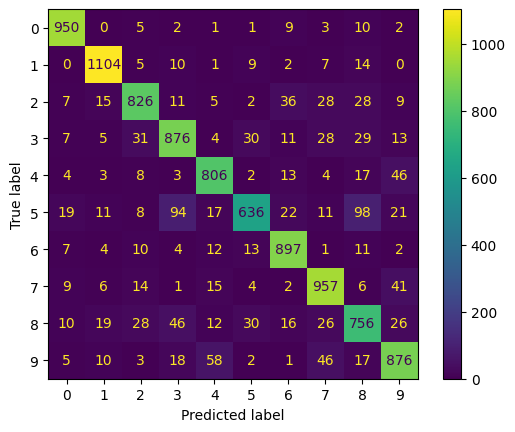

ACC: 0.968


In [11]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
print(f"ACC: {accuracy}")


We will also provide the **confusion matrix** for each individual digit, and calculate the sensitivity (defined to be TPR) for each of the digit classes. The TPR is calculated as follows:

**TPR = TP / (TP + FN)**

Calculating Confusion Matrices and Sensitivities:   0%|          | 0/10 [00:00<?, ?it/s]

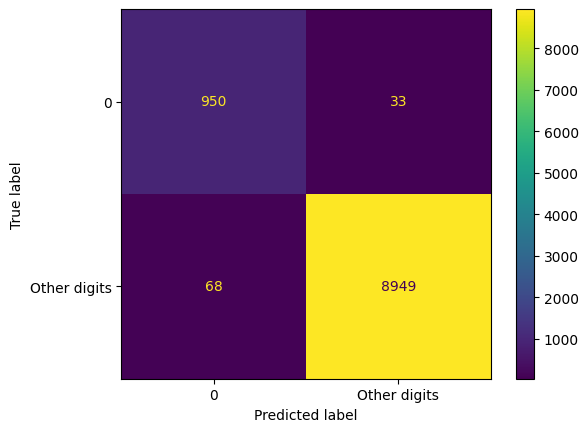


TPR of digit 0: 0.9332023575638507


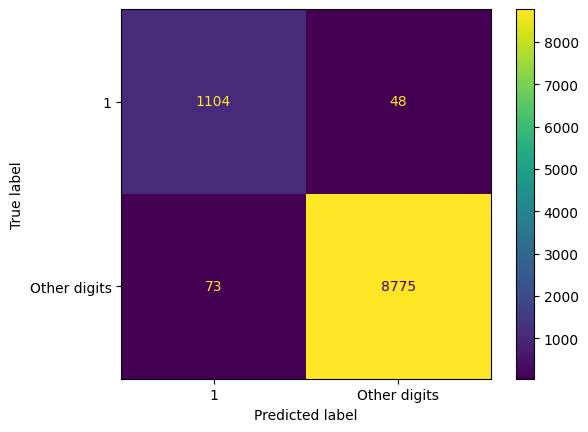


TPR of digit 1: 0.9379779099405268


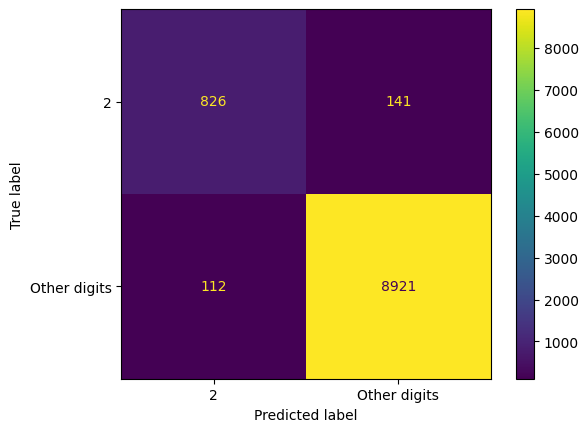


TPR of digit 2: 0.8805970149253731


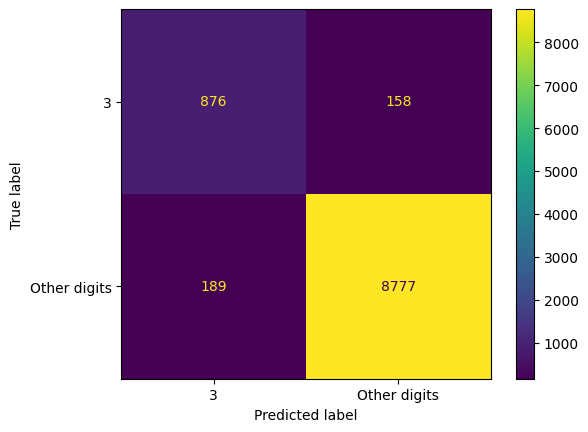


TPR of digit 3: 0.8225352112676056


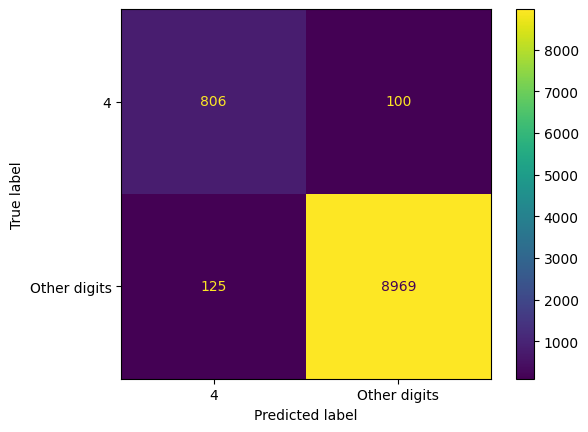


TPR of digit 4: 0.8657357679914071


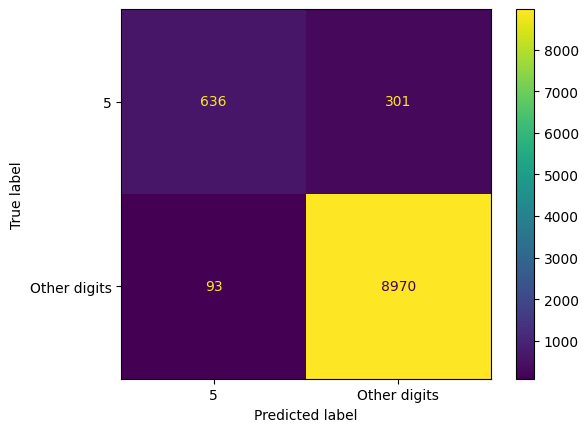


TPR of digit 5: 0.8724279835390947


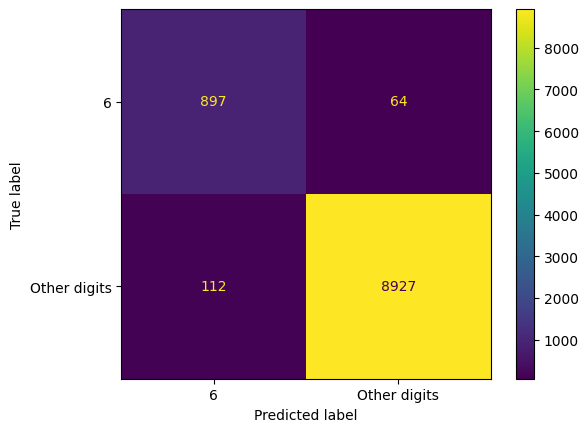


TPR of digit 6: 0.8889990089197225


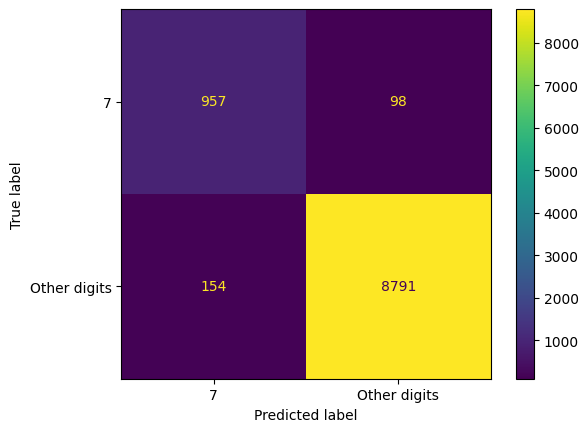


TPR of digit 7: 0.8613861386138614


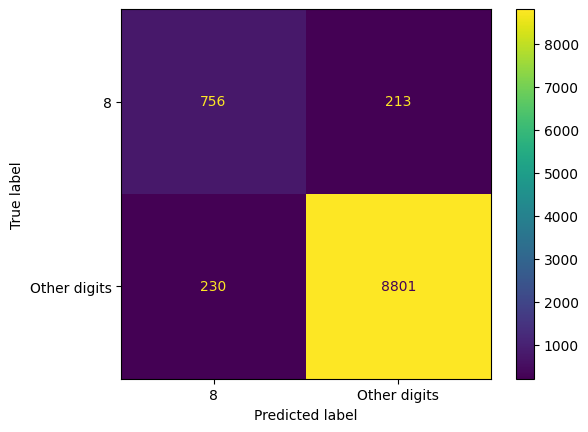


TPR of digit 8: 0.7667342799188641


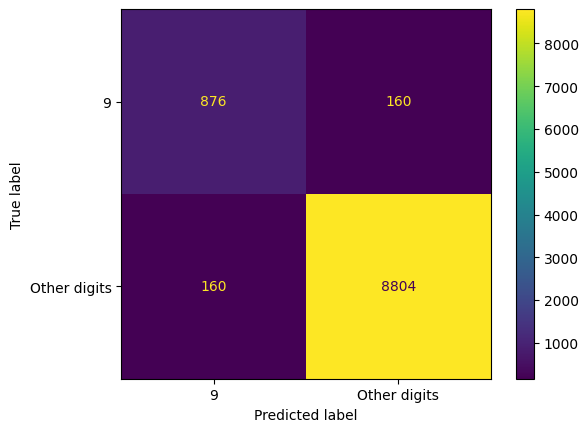


TPR of digit 9: 0.8455598455598455


In [12]:
for i in tqdm(range(10), desc='Calculating Confusion Matrices and Sensitivities'):
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = binary_confusion_matrix[i], display_labels = [i,'Other digits'])
  cm_display.plot()
  plt.show()
  print(f"\nTPR of digit {i}: {sensitivity[i]}")




### Train loss vs. Test loss graph

Since the **train_loss_history** and **test_loss_history** are lists that contain loss values for training and testing across multiple epochs, we take the average of these values in order to display the train function and test function on the graph.

In [13]:
avg_train_loss_history = np.mean(np.array(train_loss_history), axis=0)
avg_test_loss_history = np.mean(np.array(test_loss_history), axis=0)

The training loss function vs. Test loss function per epochs:

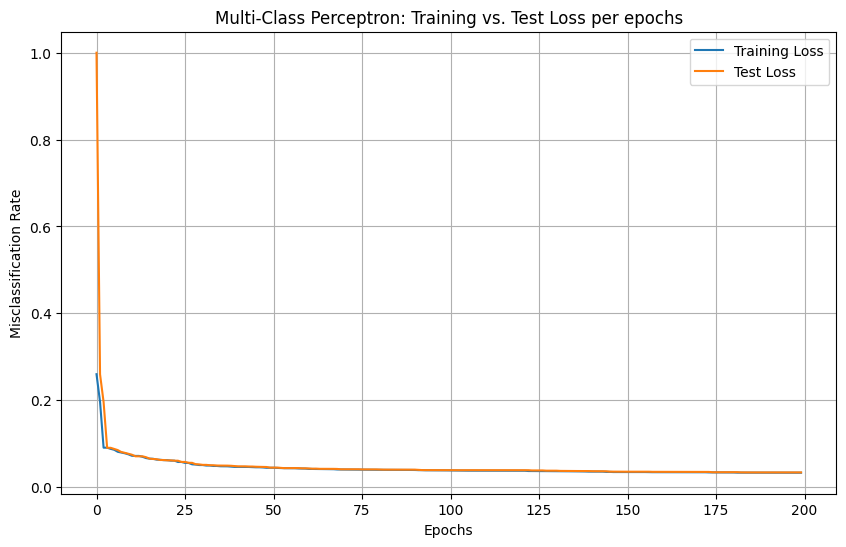

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(avg_train_loss_history, label='Training Loss')
plt.plot(avg_test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Misclassification Rate')
plt.title('Multi-Class Perceptron: Training vs. Test Loss per epochs')
plt.legend()
plt.grid(True)
plt.show()


## Performance Evaluation:
- Using the multi-class Perceptron approach, we have achieved an accuracy of **0.9635** on the given test set (96.35% accuracy).  

- Digit sensitivities are ranging from **0.785** to **0.943** (digit 0 having the highest sensitivity and digit 3 and 4 having the lowest sensitivities)

- Train loss and test loss functions decreased as the model learned (more epochs), indicating that it's learning and generalizing well.

Using these metrics we can see that the overall performance of the multi-class perceptron is good. The accuracy of the model reflects strong performance.
Digit 0 appears to be the most distinguishable likely due to its distinct shape and minimal overlap with other digits. However, digit 3 and digit 4 became the most challenging digits to distinguish, as they tend to share visual similarities with other digits.

Moreover, the model falsely indicated that the digit 5 is 3 (97 times) and the digit 5 is 8 (77 times). This also indicates that the model struggles to distinguish between these pairs of digits.

In terms of the learning behavior, we expected the training and test losses to start relatively high (since the model's weights are initially random and the model hasn't learned anything yet) and as the model trains, both the training and the test loss functions should decrease and eventually converge. We may see that the model respects this expected outcome and provides a suitable behavior for a well-trained multi-class perceptron.

**Strengths**:
1. **High Accuracy**

2. **Simplicity** - The perceptron is computationally efficient and straightforward to implement

**Weaknesses**:
1. Difficulty with complex digits - the model tends to struggle with digits that share some structural patterns like 3 or 4.

2. Because of the Perceptron Algorithm simple approach, the accuracy might still be considered lower than other more complex models.



## Part B: Softmax Regression 🌐
In this section we will use another technique called **Softmax Regression**. It is an extension of the binary **Logistic Regression** model that deals with multi-class classification task.

In binary classification, **Logistic Regression** uses a **sigmoid function** to output the probability that a given input belongs to the positive class (+1) or the negative class (0). However, when dealing with multiple classes, the sigmoid function cannot handle more than two possible outcomes.

Therefore, we will use **Softmax Regression** in order to implement the **Softmax function**, which generalizes the sigmoid function to a multi-class problem. The Softmax function computes the probabilities for each class, making sure that the sum of all probabilities is 1.





### Softmax Regression



We first compute the **Softmax probabilities** for the multi-class classification problem. These probabilities are central to Softmax Regression because they represent the predicted probabilities of each class for a given input.

We have the input samples X and the weight matrix W and we first make matrix multiplication to compute the **logits Z** which are essentialy the raw scores for each class and each sample.

Since the Softmax function involves exponentials, directly computing `np.exp(Z)` can potentially lead to numerical overflow if Z will contain very large values. Therefore, we subtract the maximum Z value along each row (corresponding to each sample). In this way, we ensure numerical stability without affecting the final probabilities (as the maximum value cancels out in the normalization step).

After stabilizing Z, we calculate the **Softmax probabilities** by normalizing the logits using **Softmax function**.

In [15]:
def softmax_prob_calc(X,W):
  Z = X @ W.T # We compute the logits Z
  exp_Z = np.exp(Z - np.max(Z, axis = 1, keepdims=True)) # Avoid overflow for value computation, subtract max value for each row in Z
  softmax_probs = exp_Z / np.sum(exp_Z, axis = 1, keepdims=True) # Normalize the logits using softmax function
  return softmax_probs

We then calculate the **Cross-entropy loss** using the mean cross-entropy loss formula with the true class labels (**true_y**) and predicted probabilities (**pred_y**).

Cross-entropy loss evaluates how well the predicted probability distribution aligns with the true class labels. This loss function will penalize incorrect predictions more heavily when the predicted probability for the correct class is low, encouraging the model to produce higher confidence for correct classifications.



In [16]:
def cross_entropy_loss(true_y, pred_y):
  loss = -np.mean(np.sum(true_y * np.log(pred_y), axis=1)) # Implementation of mean cross entropy loss
  return loss

Now we can use the functions we have created to implement the **Softmax Regression** model. This implementation trains the model and minimizes the error using **gradient descent method**, an optimization algorithm that reduces the difference between predicted labels and actual labels.

During training, the weights are updated iteratively using the learning rate and the computed gradients.

In addition, we also maintain  **train_losses** and **test_losses** lists to store the cross-entropy loss values for the training and test sets. The final output of this implementation are the trained weight vectors as well as training loss and test loss histories.

In [17]:
def softmax_regression(X, y, X_test, y_test, lr = 0.01, max_epochs=100):
  num_samples, num_features = X.shape # extract the number of samples with which we work and define the features (x0,...,xn values)
  num_classes = y.shape[1] # we divide the number of classes to be the number of digits
  weights = np.zeros((num_classes, num_features)) # initialize weights to zeros
  train_losses = [] # for visualization of train loss function
  test_losses = [] # for visualization of test loss function

  for epoch in tqdm(range(max_epochs), desc= 'Epoch'):
    y_pred = softmax_prob_calc(X, weights)
    loss = cross_entropy_loss(y, y_pred)

    gradient = (y_pred - y).T @ X / num_samples
    weights-= lr * gradient # Gradient Descent
    train_losses.append(loss)

    y_pred_test = softmax_prob_calc(X_test, weights)
    test_loss = cross_entropy_loss(y_test, y_pred_test)
    test_losses.append(test_loss)

  print("Training complete")
  return weights, train_losses, test_losses

Using these trained weights, we would be able to predict the labels for the test samples from the model, by finding the class to which each sample belongs based on the highest probability:

In [18]:
def predict_softmax_regression(X, W):
  softmax_probs = softmax_prob_calc(X, W)
  predicted_labels = np.argmax(softmax_probs, axis=1)
  print("Predictions made")
  return predicted_labels

### Training and Prediction
Now when we have provided all the necessary implementations, we are ready to train the model on the **X_train_scaled_with_bias** set and the **y_onehot_train** set. We also input **X_test_scaled_with_bias** and **y_onehot_test** into the function in order to get the train loss and test loss results.

We have chosen to use a learning rate of 0.15 because it can be considered a large enough rate to make noticeable progress per epoch but it is also not too big to mislead the model from reaching the optimal solution.

We have also chosen the max_epochs to be 225, because it will allow the model to have enough time to train and correct itself on the large data set it trains on. This will also give the model the time to converge (something that might have been prevented if we would've chosen smaller max_epochs). On the other hand, we don't want to overfit our model so we didn't try to take a bigger number.

The final output will be a new list of weights (named **'W'**), **train_loss** and **test_loss** histories.  



In [19]:
W, train_losses, test_losses = softmax_regression(X_train_scaled_with_bias, y_onehot_train, X_test_scaled_with_bias, y_onehot_test, lr = 0.15, max_epochs = 225)

Epoch:   0%|          | 0/225 [00:00<?, ?it/s]

Training complete


Now we will make the predictions on the **X_test_scaled_with_bias** using the weights we got from the training. The output will be the predictions of the model on the test set that we have made (called y_pred).

In [20]:
y_pred = predict_softmax_regression(X_test_scaled_with_bias, W)

Predictions made


### Results and Graphs:


 After applying the Softmax Regression algorithm, we will compute the **confusion matrix** for the multi-class classification problem on the **test data**. Just like in part A, we will visualize all the important details, including the train loss and the test loss functions graph:

In [21]:

# Calculate Confusion Matrix
confusion_matrix = confusion_matrix_fn(y_test, y_pred)
classes = confusion_matrix.shape[0]
sensitivity = {}
binary_confusion_matrix = {}

# Accuracy and sensitivity calculation based on the definision in the Maman
for i in tqdm(range(classes), desc="Generating model's Performance"):
  TP = confusion_matrix[i, i]
  FP = np.sum(confusion_matrix[i, :]) - TP
  FN = np.sum(confusion_matrix[:, i]) - TP
  TN = np.sum(confusion_matrix) - TP - FP - FN
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  sensitivity[i] = TP / (TP + FN)
  binary_confusion_matrix[i] = np.array([[TP, FP], [FN, TN]])



Generating model's Performance:   0%|          | 0/10 [00:00<?, ?it/s]

The confusion matrix and the accuracy (ACC) for the multi-class classification problem on the test data:

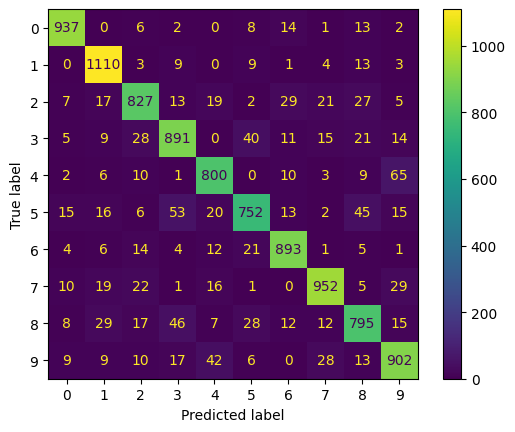

ACC: 0.9717


In [22]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
print(f"ACC: {accuracy}")

The confusion matrices for each digit and their computed sensitivity (TPR) for each class:

Calculating Confusion Matrices and Sensitivities:   0%|          | 0/10 [00:00<?, ?it/s]

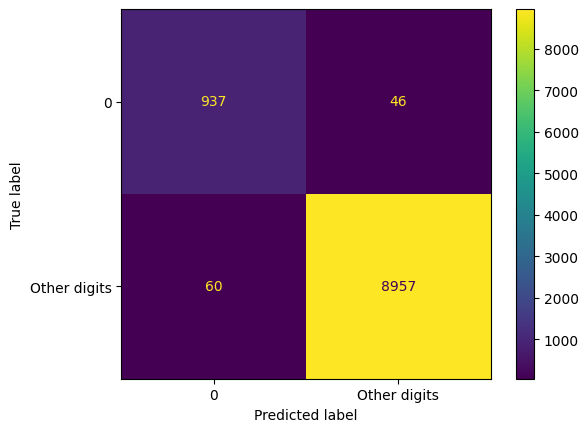


TPR of digit 0: 0.9398194583751254


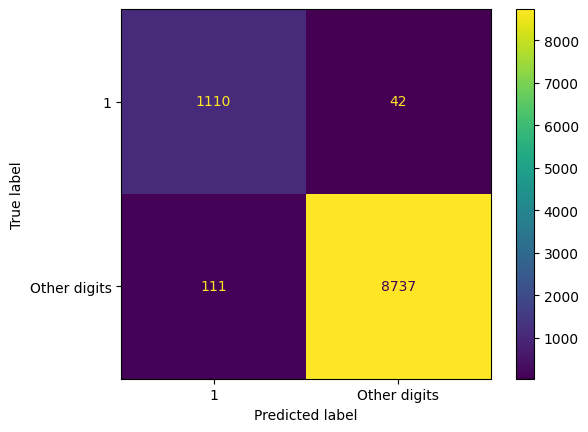


TPR of digit 1: 0.9090909090909091


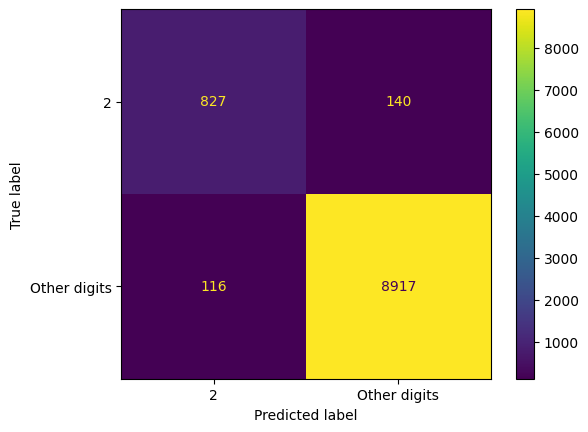


TPR of digit 2: 0.8769883351007424


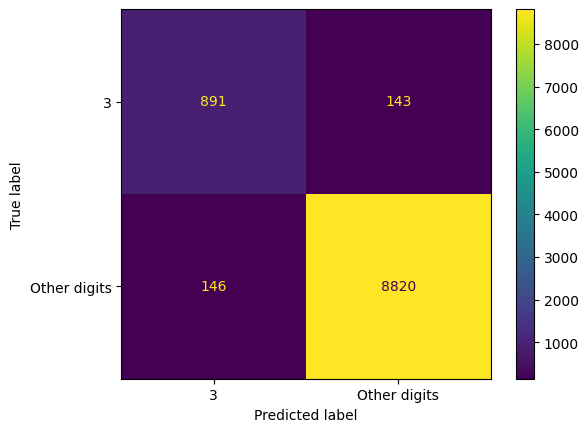


TPR of digit 3: 0.8592092574734812


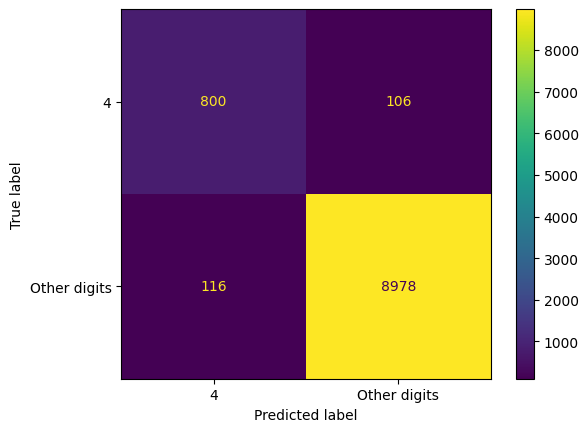


TPR of digit 4: 0.8733624454148472


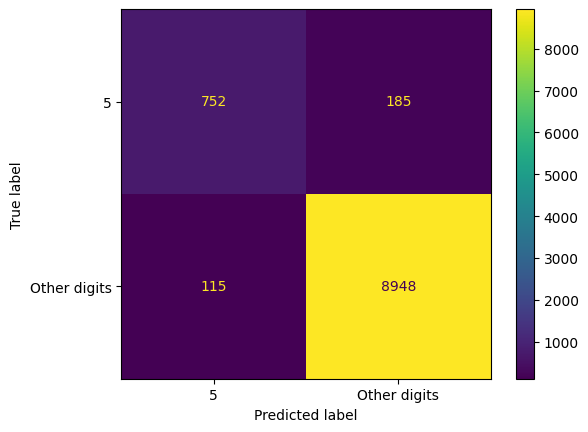


TPR of digit 5: 0.8673587081891581


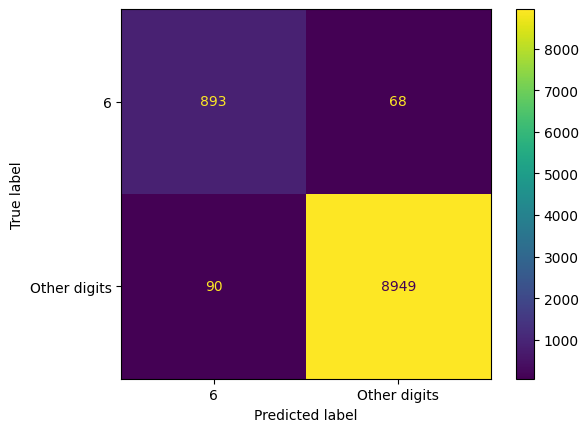


TPR of digit 6: 0.9084435401831129


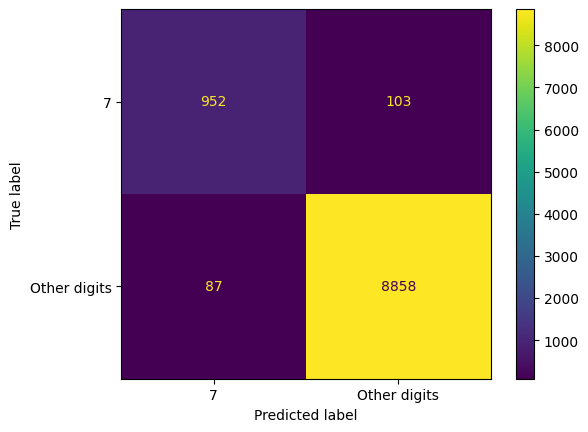


TPR of digit 7: 0.9162656400384985


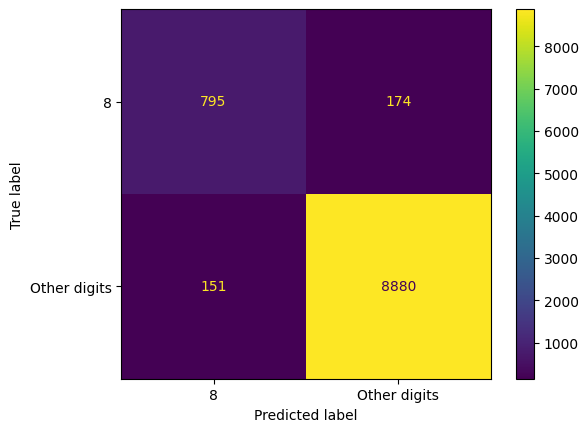


TPR of digit 8: 0.8403805496828752


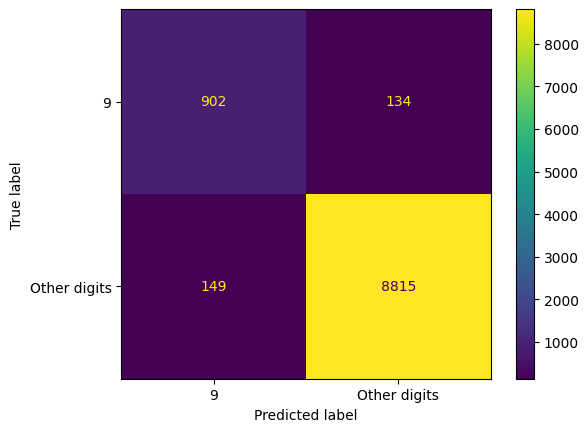


TPR of digit 9: 0.8582302568981922


In [23]:
for i in tqdm(range(10), desc='Calculating Confusion Matrices and Sensitivities'):
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = binary_confusion_matrix[i], display_labels = [i,'Other digits'])
  cm_display.plot()
  plt.show()
  print(f"\nTPR of digit {i}: {sensitivity[i]}")


### Train loss vs. Test loss graph

The training loss function vs. Test loss function:

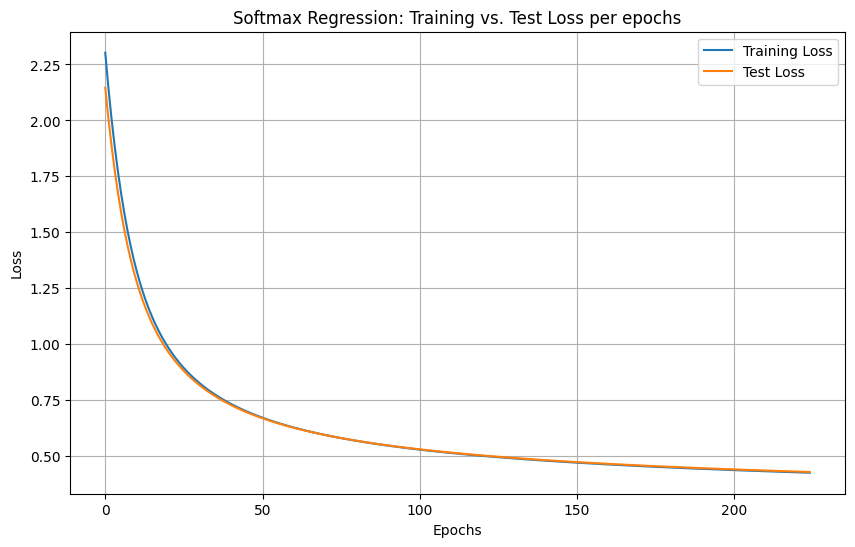

In [24]:
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Softmax Regression: Training vs. Test Loss per epochs')
plt.legend()
plt.grid(True)
plt.show()

 ## Performance Evaluation:
- Using the Softmax Regression approach, we have achieved an accuracy of **0.9717** on the given test set (97.17% accuracy)

- Digit sensitivities are ranging from **0.8403** to **0.939** (digit 0 having the highest sensitivity and digit 8 and 9 having the lowest sensitivities)

- Train loss and test loss functions decreased as the model continued to learn (more epochs), indicating that it's learning and generalizing well.

Using these metrics we can see that the overall performance of the Softmax Regression is strong and effective. It achieves a better performance accuracy than the Perceptron, leading in an increase of 1 % (in approximation).

Digit 0 appears to be the most distinguishable digit whereas digit 8 and 9 become the most challenging digits to distinguish, indicating that the algorithm may have still struggled to distinguish between their shared visual similarities with other digits (though we could argue that the algorithm managed to distinguish the digits a lot better than the Perceptron).

Moreover, the model falsely indicated that the digit 4 is 9 (65 times) and the digit 5 is 3 (53 times). This also indicates that the model struggles to distinguish between these pairs of digits.

In terms of the learning behaviour, as expected, the training and test losses start relatively high, and as the model trains, both the training and the test loss functions began to decrease and eventually converged. We may see that the model didn't overfit due to the fact that the train loss decreased without the test loss being increased. Therefore we can infer that the training process demonstrates suitable behavior for a well-trained Softmax Regression model.

**Strengths**:
1. **High Accuracy** - achieving 97.17% indicates the effectiveness of Softmax Regression and an improvement from the **Multi-Class Perceptron** accuracy

2. **Better digit sensitivity** - The model achieved an improvement in the sensitivity ratio of the digits, meaning, the sensitivities of each digit got slightly better (in comparison with Multi-Class Perceptron).

**Weaknesses**:
1. Difficulty with complex digits - although we have reached an improvement, the algorithm still tends to struggle with digits that share some structural patterns like 8, 9 or 3.

2. Softmax Regression is a more complex algorithm due to its probabilistic approach




# Part C: Linear Regression📊

**Linear Regression** is another approach to deal with multi-class classification problem. It is used to model the relationship between one or more input features (called **independent variables**) and an output variable (called **dependent variable**).

By using this approach, we are trying to find a linear equation that attempts to predict the output from the inputs in the best way possible, doing so by minimizing the error.

In order to do so, we implement our Linear Regression model by using the **Least Squares method**, which intends to minimize the sum of squared difference between the actual value 'y' and the predicted value from the model.

It is important to also mention that unlike **Multi-class Perceptron** approach and the **Softmax Regression** approach, **Linear Regression** doesn't involve any iterations or epochs. This is because the **Least Squares Method** is based on solving a closed-form equation that directly computes the optimal weights, rather than using an incremental optimization approach like we have seen in the other approaches.

As a result, there is no iterative process to track, and thus, we did not generate a graph showing training and test loss over epochs.

In order to use Linear Regression on the digit classification problem, we will implement our model as follows:

We will use the **Least Squares method** to compute the weight matrix **W** (in our case 'weights'). That is achieved by solving the **Normal Equation**. It is important to mention that in our implementation we use the pseudo-inverse when we solve the normal equation, that is because X.T @ X are not always invertible (if X isn't full rank for instance):

In [25]:
def linear_regression(X,y):
 # The normal equation
 weights = np.linalg.pinv(X.T @ X) @ X.T @ y # Using Pseudo-inverse to compute normal equation
 print("Training has completed")
 return weights


Next, we want to use the computed weights to make predictions. The result is **y_pred** vector containing the predicted class labels for each input sample.

In [26]:
def predict_linear_regression(X,W):
  Z = X @ W # logits for each class
  y_pred = np.argmax(Z, axis = 1) # select class with the highest score for each sample
  print("Predictions made")
  return y_pred

## Training and Prediction

Now when we have provided all the necessary implementations, we are ready to train the model on the **X_train_scaled_with_bias** set and the **y_onehot_train** set. The output will be a new list of weights (named **'W'**).


In [27]:
W = linear_regression(X_train_scaled_with_bias, y_onehot_train)

Training has completed


Using this new set of weights, the model will make predictions on the **X_test_scaled_with_bias** set.

In [28]:
y_pred = predict_linear_regression(X_test_scaled_with_bias, W)

Predictions made


## Results:

Here we will evaluate the performance of the **Linear Regression** model on the test set. Just like we did in the last part, we will compute the **confusion matrix** for the multi-class classification problem on the **test data**, compute the accuracy of the model, and we will also calculate the confusion matrices for each digit, as well as the sensitivities of the digits.

In [29]:

# Calculate Confusion Matrix
confusion_matrix = confusion_matrix_fn(y_test, y_pred)
classes = confusion_matrix.shape[0]
sensitivity = {}
binary_confusion_matrix = {}

# Accuracy and sensitivity calculation based on the definision in the Maman
for i in tqdm(range(classes), desc="Generating model's Performance"):
  TP = confusion_matrix[i, i]
  FP = np.sum(confusion_matrix[i, :]) - TP
  FN = np.sum(confusion_matrix[:, i]) - TP
  TN = np.sum(confusion_matrix) - TP - FP - FN
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  sensitivity[i] = TP / (TP + FN)
  binary_confusion_matrix[i] = np.array([[TP, FP], [FN, TN]])



Generating model's Performance:   0%|          | 0/10 [00:00<?, ?it/s]

**The confusion matrix and the accuracy (ACC)** for the multi-class classification problem on the test data:

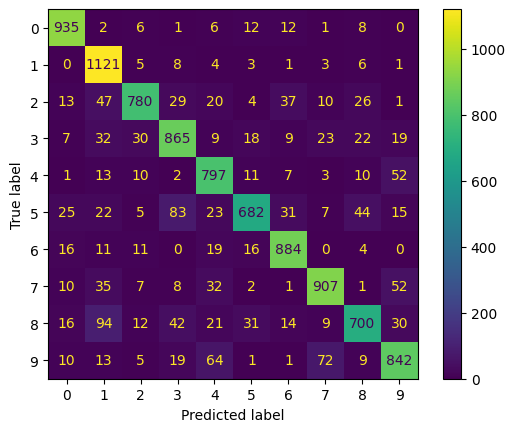

ACC: 0.9636


In [30]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
print(f"ACC: {accuracy}")

The confusion matrices for each digit and their computed sensitivity (TPR) for each class:

Calculating Confusion Matrices and Sensitivities:   0%|          | 0/10 [00:00<?, ?it/s]

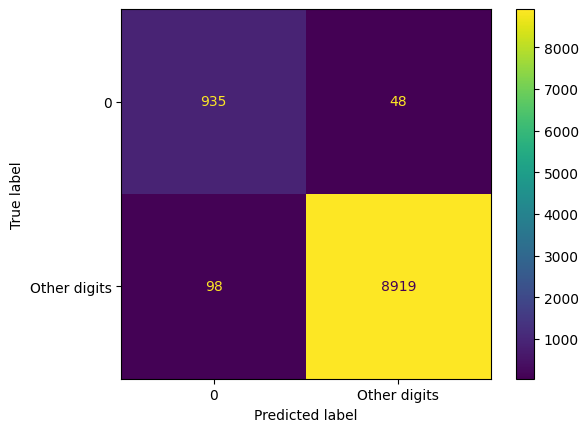


TPR of digit 0: 0.9051306873184899


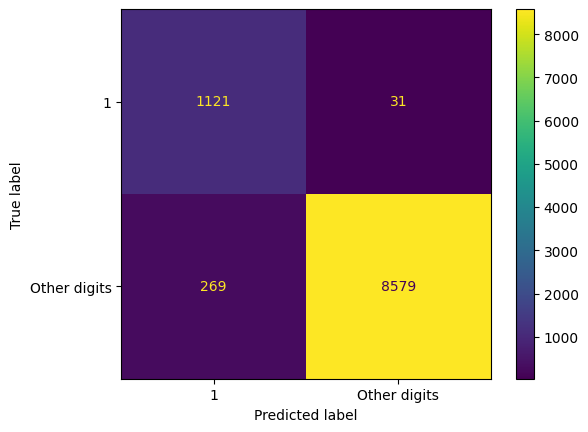


TPR of digit 1: 0.8064748201438849


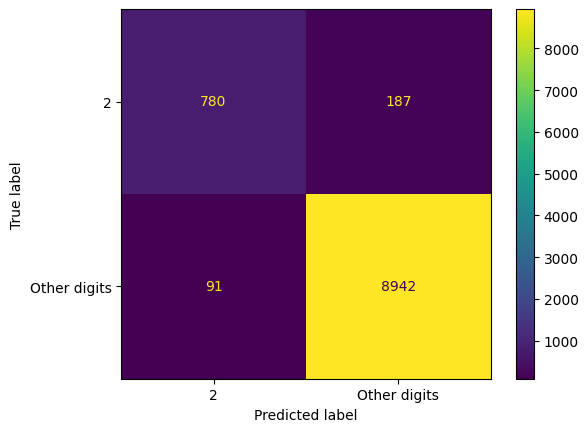


TPR of digit 2: 0.8955223880597015


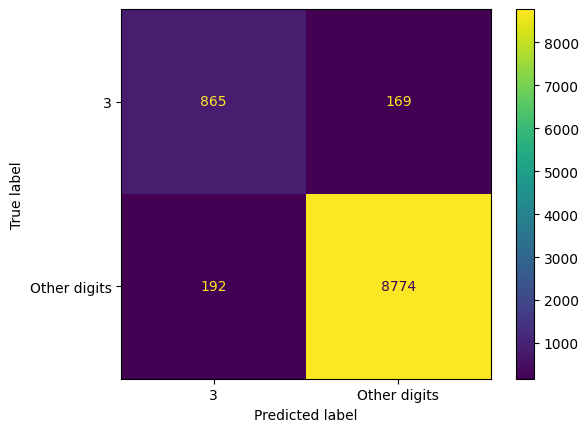


TPR of digit 3: 0.8183538315988647


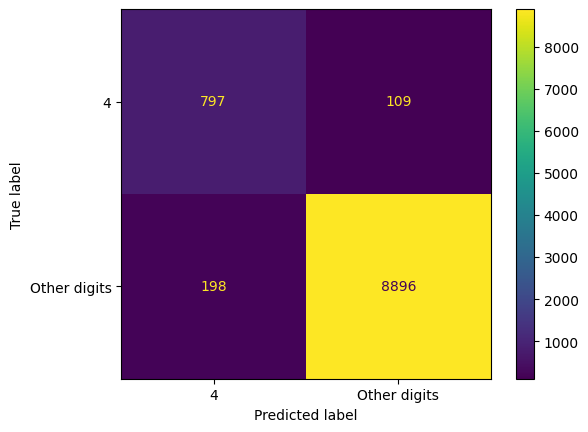


TPR of digit 4: 0.8010050251256281


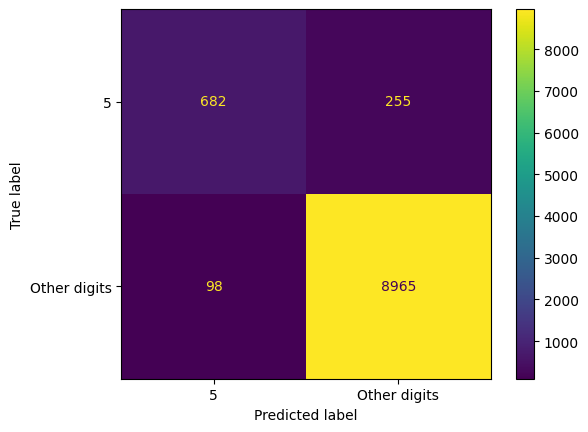


TPR of digit 5: 0.8743589743589744


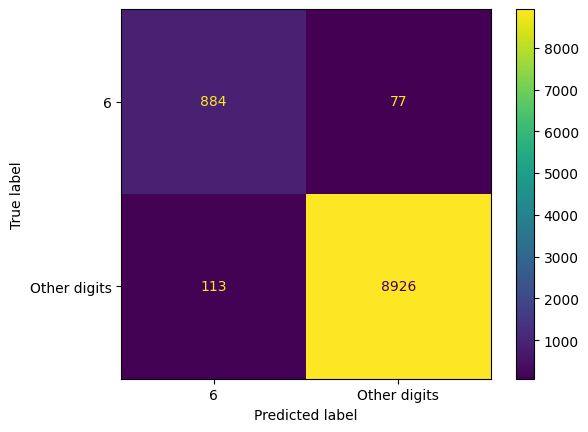


TPR of digit 6: 0.8866599799398195


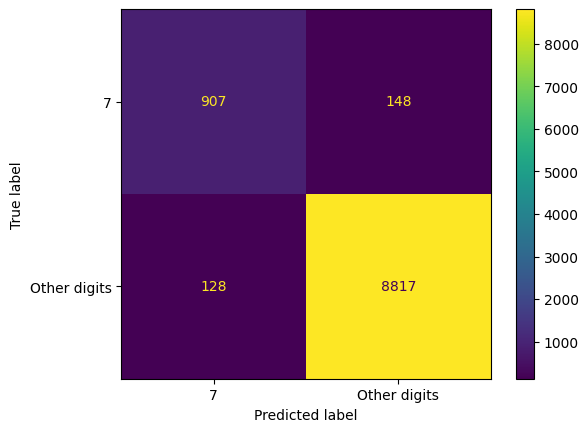


TPR of digit 7: 0.8763285024154589


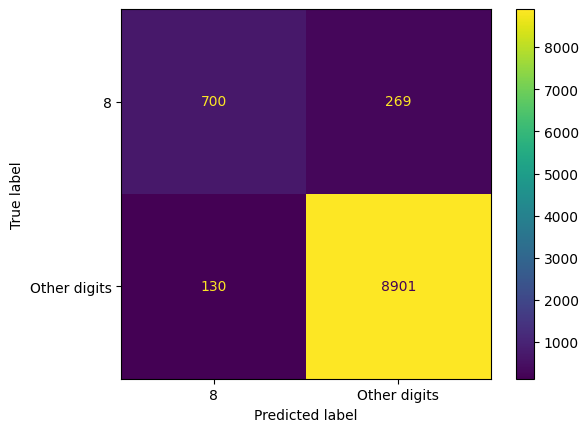


TPR of digit 8: 0.8433734939759037


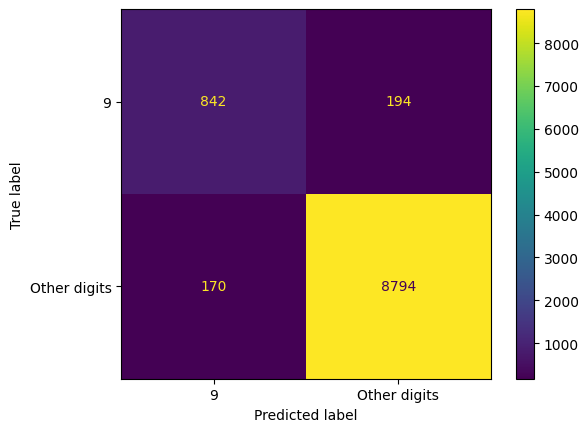


TPR of digit 9: 0.8320158102766798


In [31]:
for i in tqdm(range(10), desc='Calculating Confusion Matrices and Sensitivities'):
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = binary_confusion_matrix[i], display_labels = [i,'Other digits'])
  cm_display.plot()
  plt.show()
  print(f"\nTPR of digit {i}: {sensitivity[i]}")


## Results Evaluation and Comparison with other Approaches

We will analyze the results obtained using the Linear Regression and compare them with those achieved through the **Perceptron Algorithm** and **Softmax Regression**.

- Using the Linear Regression approach, we have achieved an accuracy of **0.9636** on the test set (96.36% accuracy)

- Digit sensitivities are ranging from **0.8010** to **0.905** (digit 0 having the highest sensitivity and digit 4 having the lowest sensitivity)

Using these metrics we can see that the overall performance of the **Linear Regression** is good. In comparison to the Perceptron Algorithm, it manages to get an improvement in the accuracy by a small margin. However, its accuracy is still lower than the **Softmax Regression**.

As for the sensitivity comparisons, the highest sensitivity for **Linear Regression** is noticeably lower than the highest sensitivities achieved by the Perceptron and Softmax Regression models.

(C4)
**Strengths**:
1. **Very Simplistic** - **Linear Regression** is easy to implement and is computationally inexpensive

2. **Accuracy** - Although the accuracy isn't greater than the **Softmax Regression**'s accuracy, it is still slightly better than the **Perceptron**

**Weaknesses**:
1. **Linear Regression** assumes a linear relationship between input pixels and output labels. However, in the case of MNIST dataset, digit patterns are complex and non-linear, which in turn can make the algorithm perform poorly.

2. There are other more complex models that can obtain a greater accuracy compared to **Linear Regression**.

**Limitiations**:

As mentioned above, **Linear Regression** assumes a linear relationship between input features and output labels but in the case of the MNIST dataset, the algorithm would only be able to reach suboptimal decision boundaries, which in turn will result in misclassifications, especially for digits with overlapping features like 4 or 9.

In addition, **Linear Regression** in the implementation of **Least Squares method** doesn't benefit from iterative optimization, like the other 2 methods. Once the weights are computed through the closed-form solution, they remain fixed, even if there is a high error rate. This means **Linear Regression** cannot iteratively refine its weights to reduce errors further, unlike the Perceptron or Softmax Regression that do use iterative optimization techniques.

# Conclusion:

By using the implementations we have presented in each part of this notebook, we have achieved the following results:

| Model                  | Accuracy  | Highest Sensitivity      | Lowest Sensitivity       |
|------------------------|-----------|--------------------------|--------------------------|
| Multi-Class Perceptron | 96.35%    | 0.943         | 0.785         |
| Softmax Regression     | 97.17%    | 0.939         | 0.8403       |
| Linear Regression      | 96.36%    | 0.905          | 0.801        |

---

## So what can we understand from these results?
Based on the results we have in the table above, and the information about the implementations we have presented in each part, we can conclude that:

1. **Softmax Regression** is the best-performing model in terms of accuracy and balanced sensitivity. It is ideal for tasks that require high accuracy and probabilistic insights.

2. **Linear Regression** performs slightly better than **Multi-Class Perceptron** in accuracy but struggles with non-linear patterns that exist in the MNIST dataset.

3. **Multi-Class Perceptron** is computationally efficient and simple to implement, making it a good choice for basic classification tasks when computational resources are limited.

  - If we were to seek high accuracy and balanced performance across classes, then **Softmax Regression** would be the best choice.

  - If we were to seek computational efficiency, both **Linear Regression** and **Multi-Class-Perceptron** could be suitable. However, due to the fact that **Linear Regression** is designed for regression tasks, the model can lead to suboptimal classification performance. Therefore the **Multi-class Perceptron** algorithm could be more suitable for separating
classses in the MNIST dataset.

